# [Web Scraping](https://academy.dqlab.id/main/projectcode/170/333/1597)

In [2]:
#import library yang dibutuhkan
import pandas as pd
import requests
from bs4 import BeautifulSoup

#buatlah request ke website
website_url = requests.get('https://id.wikipedia.org/wiki/Demografi_Indonesia').text
soup = BeautifulSoup(website_url, 'lxml')

#ambil table dengan class 'wikitable sortable'
my_table = soup.find('table', {'class':'wikitable sortable'})

#cari data dengan tag 'td'
links = my_table.findAll('td')

#buatlah lists kosong 
nama = []
luas_km = []
populasi10 = []
populasi20 = []

#memasukkan data ke dalam list berdasarkan pola HTML
for i, link in enumerate(links):
	if i in range(0, len(links), 4):
		nama.append(link.get_text()[:-1])
	if i in range(1, len(links), 4):
		luas_km.append(link.get_text()[:-1])
	if i in range(2, len(links), 4):
		populasi10.append(link.get_text()[:-1])
	if i in range(3, len(links), 4):
		populasi20.append(link.get_text()[:-1])

#buatlah DataFrame dan masukkan ke CSV
df = pd.DataFrame()
df['Nama Provinsi'] = nama
df['Luas km'] = luas_km
df['Populasi 2010'] = populasi10
df['Populasi 2020'] = populasi20
df.to_csv('Indonesia_Demography_by_Province.csv', index=False, encoding='utf-8', quoting=1)
print(df)

                    Nama Provinsi     Luas km Populasi 2010 Populasi 2020
0                            Aceh   56.500,51     4.494.410     5.274.871
1                   Sumatra Utara   72.427,81    12.982.204    14.799.361
2                   Sumatra Barat   42.224,65     4.846.909     5.534.472
3                            Riau   87.844,23     5.538.367     6.394.087
4                           Jambi   45.348,49     3.092.265     3.548.228
5                 Sumatra Selatan   91.592,43     7.450.394     8.467.432
6                        Bengkulu   19.795,15     1.715.518     2.010.670
7                         Lampung   37.735,15     7.608.405     9.007.848
8       Kepulauan Bangka Belitung   16.424,14     1.223.296     1.455.678
9                  Kepulauan Riau    8.084,01     1.679.163     2.064.564
10  Daerah Khusus Ibukota Jakarta      740,29     9.607.787    10.562.088
11                     Jawa Barat   36.925,05    43.053.732    48.274.162
12                    Jawa Tengah   32

# [Function and Regular Expression](https://academy.dqlab.id/main/projectcode/170/333/1598?pr=)

Dalam kasus ini kita akan menggunakan library re atau regular Expression. Regular expression (regex) adalah deretan karakter yang digunakan untuk pencarian string atau teks dengan menggunakan pola (pattern). Jadi Kita akan membuat sebuah pola sedemikian sehingga input email dari 9 row data diatas sesuai dengan output-nya (Pass/Not Pass). 

Dalam regex ada yang namanya Meta Character yang berarti karakter khusus yang menjadi acuan terbentuk nya pola. Berikut Meta Character.

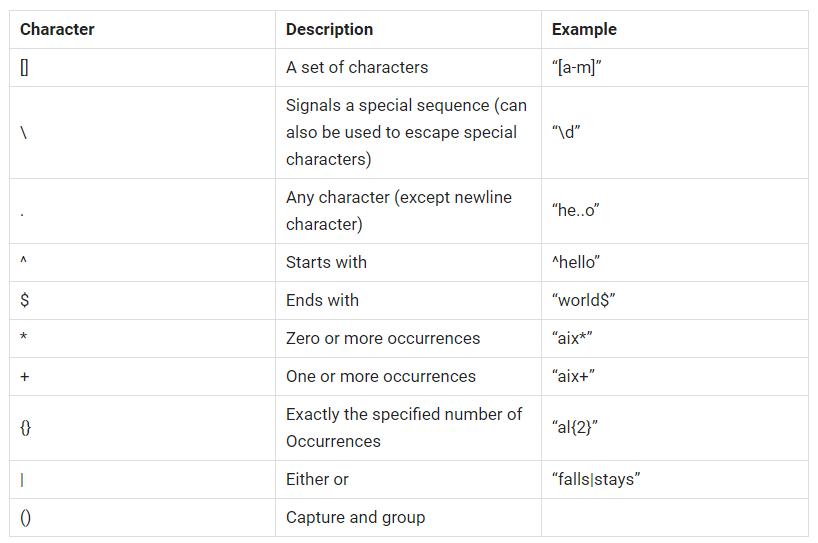

In [3]:
#import library yang dibutuhkan
import re

#function email_check
def email_check(input):
  match = re.search('(?=^((?!-).)*$)(?=[^0-9])((?=^((?!\.\d).)*$)|(?=.*_))', input)
  if match:
    print('Pass')
  else:
    print('Not Pass')

#Masukkan data email ke dalam list
emails = ['my-name@someemail.com',
          'myname@someemail.com',
          'my.name@someemail.com',
          'my.name2019@someemail.com',
          'my.name.2019@someemail.com',
          'somename.201903@someemail.com',
          'my_name.201903@someemail.com',
          '201903myname@someemail.com',
          '201903.myname@someemail.com']

#Looping untuk pengecekan Pass atau Not Pass, gunakan variabel email untuk mengiterasi emails
for email in emails:
  email_check(email)

Not Pass
Pass
Pass
Pass
Not Pass
Not Pass
Pass
Not Pass
Not Pass


Email pertama, ‘my-name@someemail.com’ output nya “Not Pass”. Dari 9 email yang ditampilkan, hanya email pertama ini yang menggunakan tanda strip/minus “-”. Kita ambil kesimpulan sementara email dengan yang mengandung karakter “-” akan menghasilkan output “Not Pass”

Pola nya yaitu

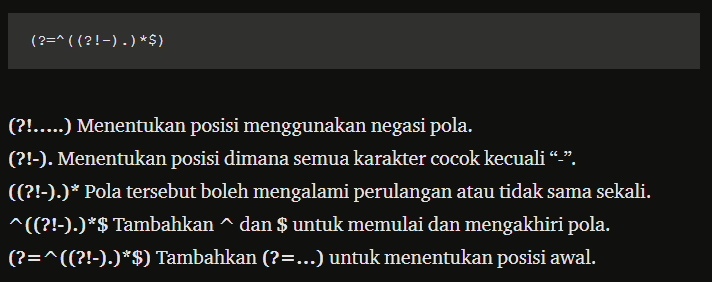

Setelah didapatkan pola pertama, mari kita lihat lagi data email- nya. Perhatikan email ke 8 dan 9, ‘201903myname@someemail.com’ dan ‘201903.myname@someemail.com’. Kedua email ini punya output “Not Pass”. Persamaan email ini adalah sama-sama di awali oleh angka. Dapat kita ambil kesimpulan bahwa email yang di awali oleh angka akan menghasilkan output “Not Pass”. 

Polanya,

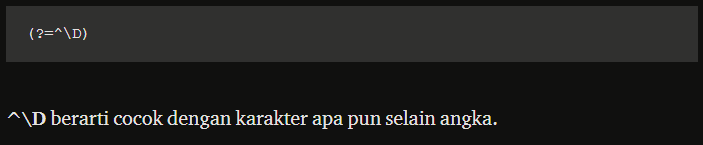

Lanjut perhatikan email ke 5 dan email ke 6 yang mengeluarkan output “Not Pass” ‘my.name.2019@someemail.com’ dan
‘somename.201903@someemail.com’. Kedua kesamaan dari email tersebut adalah email tersebut mengandung karakter “.” dan diikuti dengan angka. Ternyata email ke 7 ‘my_name.201903@someemail.com’ yang outpunya “Pass” juga memiliki karakter dengan pola “.” diikuti angka. Namun terdapat perbedaan yaitu hanya email ke 7 mengandung karakter “_”.
Maka kita dapat membuat pola dengan logika dimana pola nya tidak cocok untuk email yang mengandung karakter “.” diikuti angka atau cocok dengan email yang mengandung karakter “.” diikuti angka dan mengandung karakter “_”.

Berikut pola nya,

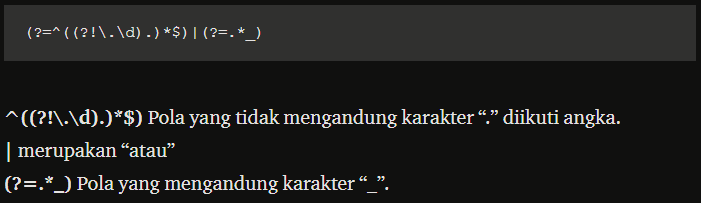

In [ ]:
"""
pola yang terbentuk :

(?=^((?!-).)*$)(?=[^0-9])((?=^((?!\.\d).)*$)|(?=.*_))
"""

referensi

https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/#:~:text=A%20Regular%20Expressions%20%28RegEx%29%20is%20a%20special%20sequence,that%20supports%20the%20use%20of%20regex%20in%20Python.